# Reducibility: test on simple synthetic structures

In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from tqdm import tqdm

sys.path.append("../src/")

import xgi
from reducibility_hg import *

sb.set_theme(style="ticks", context="paper")

In [2]:
results_dir = "../results/"
out_dir  = f"{results_dir}synthetic/"

In [ ]:
def pad_arr_list(arr_list):
    max_shape = max([a.shape[0] for a in arr_list])

    # Pad the shorter arrays with zeros
    padded_arr_list = [np.pad(a, (0, max_shape-a.shape[0]), mode='constant', constant_values=None) for a in arr_list]
    return padded_arr_list

In [3]:
def plot_3panels(info_losses, complexities, orders, labels, legend_title=None):
    
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2.1), constrained_layout=True, sharey=True)

    n = len(info_losses)
    
    for i in range(n):
        ax1.plot(orders[i], info_losses[i], "o-", label=labels[i], ms=7, mfc="w", lw=2)      

    ax1.set_title("Information Loss (KL)")
    ax1.set_xlabel("Max Order")
    ax1.set_ylabel("Bits")
    
    for i in range(n):
        ax2.plot(orders[i], complexities[i], "o-", label=labels[i], ms=7, mfc="w", lw=2)      

    ax2.set_title("Model Complexity ($\delta S$)")
    ax2.set_xlabel("Max Order")
    
    for i in range(n):
        message_length = complexities[i] + info_losses[i]
        ax3.plot(orders[i], message_length, "o-", label=labels[i], ms=7, mfc="w", lw=2)

    ax3.legend(title=legend_title, bbox_to_anchor=(1, 0.5), frameon=False, loc="center left")

    ax3.set_title("Message Length")
    ax3.set_xlabel("Max Order")

    sb.despine()

    #fig.suptitle(f"Complete hypergraph N={N}")

    #fig_name = f"message_length_complete_hypergraph_N{N}" #lambda2_HG_SC_N_{N}_ps_{ps}_nrep_{n_repetitions}"

    #plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
    
    return fig, (ax1, ax2, ax3)

## Complete Hypergraph

In [4]:
N = 50
rescale = True

H0 = xgi.complete_hypergraph(N, max_order=2)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

In [5]:
tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
tau_c

0.48999999999999916

In [6]:
Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)

In [7]:
H3 = xgi.complete_hypergraph(N, max_order=3)
Ds_H3, lZs_H3, orders3 = compute_information(H3, tau_c, rescale_per_node=rescale)

H4 = xgi.complete_hypergraph(N, max_order=4)
Ds_H4, lZs_H4, orders4 = compute_information(H4, tau_c, rescale_per_node=rescale)

KeyboardInterrupt: 

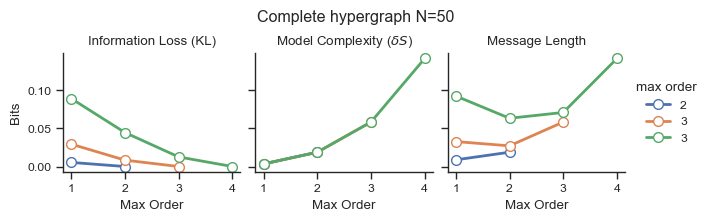

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2.1), constrained_layout=True, sharey=True)


ax1.plot(orders, Ds_H, "o-", label=f"2", ms=7, mfc="w", lw=2)    
ax1.plot(orders3, Ds_H3, "o-", label=f"3", ms=7, mfc="w", lw=2)    
ax1.plot(orders4, Ds_H4, "o-", label=f"3", ms=7, mfc="w", lw=2)    

ax1.set_title("Information Loss (KL)")
ax1.set_xlabel("Max Order")
ax1.set_ylabel("Bits")

ax2.plot(orders, lZs_H, "o-", ms=7, mfc="w", lw=2)
ax2.plot(orders3, lZs_H3, "o-", ms=7, mfc="w", lw=2)
ax2.plot(orders4, lZs_H4, "o-", ms=7, mfc="w", lw=2)

ax2.set_title("Model Complexity ($\delta S$)")
ax2.set_xlabel("Max Order")

Q = Ds_H + lZs_H
ax3.plot(orders, Q, "o-", label=f"2", ms=7, mfc="w", lw=2)
Q3 = Ds_H3 + lZs_H3
ax3.plot(orders3, Q3, "o-", label=f"3", ms=7, mfc="w", lw=2)
Q4 = Ds_H4 + lZs_H4
ax3.plot(orders4, Q4, "o-", label=f"3", ms=7, mfc="w", lw=2)
ax3.legend(title="max order", bbox_to_anchor=(1, 0.5), frameon=False, loc="center left")

ax3.set_title("Message Length")
ax3.set_xlabel("Max Order")

sb.despine()

fig.suptitle(f"Complete hypergraph N={N}")

fig_name = f"message_length_complete_hypergraph_N{N}" #lambda2_HG_SC_N_{N}_ps_{ps}_nrep_{n_repetitions}"

#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

In [ ]:
info_losses = [Ds_H, Ds_H3, Ds_H4]
complexities = [lZs_H, lZs_H3, lZs_H4]
orders_arr = [orders, orders3, orders4]
labels = ["2", "3", "4"]

plot_3panels(info_losses, complexities, orders_arr, labels, legend_title="max order")

plt.show()

## Random SC: vary density

In [19]:
N = 50
rescale = True
ps = np.arange(0.1, 1., 0.2)
print(ps)

Hs = []
for p in tqdm(ps):
    H = xgi.random_flag_complex(N, p, max_order=3)
    Hs.append(H)

orders = np.array(xgi.unique_edge_sizes(Hs[0])) - 1
weights = np.ones(len(orders))

[0.1 0.3 0.5 0.7 0.9]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:39<00:00, 43.95s/it]


In [20]:
[find_charact_tau(H0, orders, weights, rescale_per_node=False) for H0 in Hs]

[0.06644508387463476,
 0.15365700384128775,
 0.22121987654424985,
 0.24541145135771733,
 0.2759012478943249]

In [33]:
info_losses = []
complexities = []
orders_arr = []
message_lengths = []

for H0 in Hs:
    
    orders = np.array(xgi.unique_edge_sizes(Hs[0])) - 1
    tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
    Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)
    
    info_losses.append(Ds_H)
    complexities.append(lZs_H)
    orders_arr.append(orders)
    message_lengths.append(Ds_H + lZs_H)

labels = [f"{i:.1f}" for i in ps]

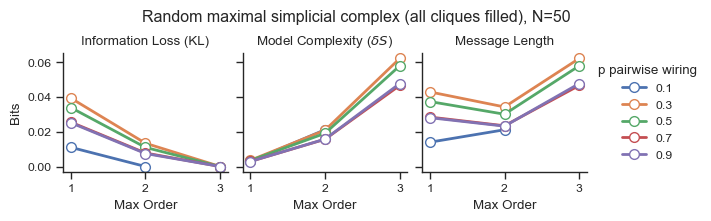

In [34]:
fig, axs = plot_3panels(info_losses, complexities, orders_arr, labels, legend_title="p pairwise wiring")

fig.suptitle(f"Random maximal simplicial complex (all cliques filled), N={N}")

fig_name = f"message_length_RSC_N{N}_pwiring_{ps}"
#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

## Random hypergraph

In [99]:
N = 100
ps = np.array([1 / N, 100 / N**2, 1 / N**3, 1 / N**4]) # wiring probas
sparsity_scales = [1, 10, 50, 100]

rescale = False

Hs = []
for sparsity in tqdm(sparsity_scales):
    print(sparsity * ps)
    H = xgi.random_hypergraph(N, sparsity * ps)
    print(H)
    Hs.append(H)

orders = np.array(xgi.unique_edge_sizes(Hs[0])) - 1
weights = np.ones(len(orders))

  0%|                                                       | 0/4 [00:00<?, ?it/s]

[1.e-02 1.e-02 1.e-06 1.e-08]


 25%|███████████▊                                   | 1/4 [00:03<00:09,  3.14s/it]

Unnamed Hypergraph with 100 nodes and 1654 hyperedges
[1.e-01 1.e-01 1.e-05 1.e-07]


 50%|███████████████████████▌                       | 2/4 [00:06<00:06,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 16616 hyperedges
[5.e-01 5.e-01 5.e-05 5.e-07]


 75%|███████████████████████████████████▎           | 3/4 [00:09<00:03,  3.16s/it]

Unnamed Hypergraph with 100 nodes and 83455 hyperedges
[1.e+00 1.e+00 1.e-04 1.e-06]


100%|███████████████████████████████████████████████| 4/4 [00:13<00:00,  3.37s/it]

Unnamed Hypergraph with 100 nodes and 167126 hyperedges


In [100]:
[find_charact_tau(H0, orders, weights, rescale_per_node=rescale) for H0 in Hs]

[0.010367919516234924,
 0.019543682698230886,
 0.05467865292018195,
 0.0553251101275912]

In [101]:
info_losses = []
complexities = []
orders_arr = []
message_lengths = []

for H0 in tqdm(Hs):
    
    orders = np.array(xgi.unique_edge_sizes(Hs[0])) - 1
    tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
    Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)
    
    info_losses.append(Ds_H)
    complexities.append(lZs_H)
    orders_arr.append(orders)
    message_lengths.append(Ds_H + lZs_H)

labels = [f"{i}" for i in sparsity_scales]

100%|███████████████████████████████████████████████| 4/4 [00:25<00:00,  6.40s/it]


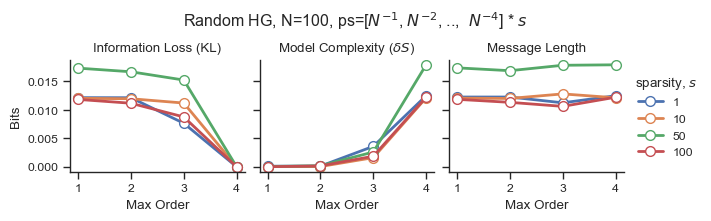

In [102]:
fig, axs = plot_3panels(info_losses, complexities, orders_arr, labels, legend_title="sparsity, $s$")

fig.suptitle(rf"Random HG, N={N}, ps=[$N^{{-1}}$, $N^{{-2}}$, ..,  $N^{{-4}}$] * $s$")

fig_name = f"message_length_RHG_N{N}_pwiring_{sparsity_scales}"
#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

### repeated realizations

In [231]:
N = 100
ps = np.array([1 / N, 1 / N**2, 1 / N**3, 1 / N**4]) # wiring probas
sparsity_scales = [1, 10, 50, 100]

n_rep = 10

rescale = True

Hs = dict()
for sparsity in tqdm(sparsity_scales):
    Hs_i = []
    for i in range(n_rep):
        print(sparsity * ps)
        H = xgi.random_hypergraph(N, sparsity * ps)
        print(H)
        Hs_i.append(H)
    Hs[sparsity] = Hs_i

orders = np.array(xgi.unique_edge_sizes(Hs[1][0])) - 1
weights = np.ones(len(orders))

  0%|                                                         | 0/4 [00:00<?, ?it/s]

[1.e-02 1.e-04 1.e-06 1.e-08]
Unnamed Hypergraph with 100 nodes and 70 hyperedges
[1.e-02 1.e-04 1.e-06 1.e-08]
Unnamed Hypergraph with 100 nodes and 64 hyperedges
[1.e-02 1.e-04 1.e-06 1.e-08]
Unnamed Hypergraph with 100 nodes and 79 hyperedges
[1.e-02 1.e-04 1.e-06 1.e-08]
Unnamed Hypergraph with 100 nodes and 76 hyperedges
[1.e-02 1.e-04 1.e-06 1.e-08]
Unnamed Hypergraph with 100 nodes and 66 hyperedges
[1.e-02 1.e-04 1.e-06 1.e-08]
Unnamed Hypergraph with 100 nodes and 62 hyperedges
[1.e-02 1.e-04 1.e-06 1.e-08]
Unnamed Hypergraph with 100 nodes and 61 hyperedges
[1.e-02 1.e-04 1.e-06 1.e-08]
Unnamed Hypergraph with 100 nodes and 71 hyperedges
[1.e-02 1.e-04 1.e-06 1.e-08]
Unnamed Hypergraph with 100 nodes and 77 hyperedges
[1.e-02 1.e-04 1.e-06 1.e-08]


 25%|████████████▎                                    | 1/4 [00:30<01:32, 30.74s/it]

Unnamed Hypergraph with 100 nodes and 68 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]
Unnamed Hypergraph with 100 nodes and 722 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]
Unnamed Hypergraph with 100 nodes and 700 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]
Unnamed Hypergraph with 100 nodes and 728 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]
Unnamed Hypergraph with 100 nodes and 684 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]
Unnamed Hypergraph with 100 nodes and 733 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]
Unnamed Hypergraph with 100 nodes and 717 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]
Unnamed Hypergraph with 100 nodes and 716 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]
Unnamed Hypergraph with 100 nodes and 700 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]
Unnamed Hypergraph with 100 nodes and 703 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 50%|████████████████████████▌                        | 2/4 [01:01<01:01, 30.95s/it]

Unnamed Hypergraph with 100 nodes and 708 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]
Unnamed Hypergraph with 100 nodes and 3502 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]
Unnamed Hypergraph with 100 nodes and 3563 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]
Unnamed Hypergraph with 100 nodes and 3480 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]
Unnamed Hypergraph with 100 nodes and 3519 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]
Unnamed Hypergraph with 100 nodes and 3616 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]
Unnamed Hypergraph with 100 nodes and 3521 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]
Unnamed Hypergraph with 100 nodes and 3505 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]
Unnamed Hypergraph with 100 nodes and 3528 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]
Unnamed Hypergraph with 100 nodes and 3480 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 75%|████████████████████████████████████▊            | 3/4 [01:33<00:31, 31.18s/it]

Unnamed Hypergraph with 100 nodes and 3473 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]
Unnamed Hypergraph with 100 nodes and 7063 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]
Unnamed Hypergraph with 100 nodes and 7036 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]
Unnamed Hypergraph with 100 nodes and 6943 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]
Unnamed Hypergraph with 100 nodes and 7093 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]
Unnamed Hypergraph with 100 nodes and 7085 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]
Unnamed Hypergraph with 100 nodes and 7052 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]
Unnamed Hypergraph with 100 nodes and 7016 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]
Unnamed Hypergraph with 100 nodes and 7042 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]
Unnamed Hypergraph with 100 nodes and 6998 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


100%|█████████████████████████████████████████████████| 4/4 [02:04<00:00, 31.12s/it]

Unnamed Hypergraph with 100 nodes and 6934 hyperedges


In [232]:
info_losses = dict()
complexities = dict()
orders_arr = dict()
message_lengths = dict()

for sparsity, Hs_i in tqdm(Hs.items()):
    
    info_losses_i = []
    complexities_i = []
    orders_arr_i = []
    message_lengths_i = []
    
    for H0 in Hs_i:
        
        orders = np.array(xgi.unique_edge_sizes(H0)) - 1
        weights = np.ones(len(orders))
        tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)
    
        info_losses_i.append(Ds_H)
        complexities_i.append(lZs_H)
        orders_arr_i.append(orders)
        message_lengths_i.append(Ds_H + lZs_H)
                  
    info_losses[sparsity] = info_losses_i
    complexities[sparsity] = complexities_i
    orders_arr[sparsity] = orders_arr_i
    message_lengths[sparsity] = message_lengths_i                          

labels = [f"{i}" for i in sparsity_scales]

100%|█████████████████████████████████████████████████| 4/4 [02:19<00:00, 34.80s/it]


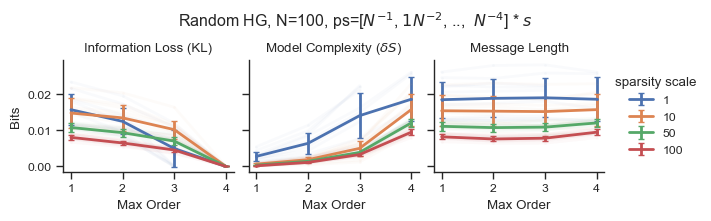

In [233]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2.1), constrained_layout=True, sharey=True)

n_s = len(info_losses)
alpha = 0.03

params = {"mfc": "white", "ms": 1, "lw": 2, "ls": "-", "marker":"o", "alpha": alpha}
params_err = {"mfc": "white", "ms": 1, "lw": 2, "ls": "-", "marker":"o", "zorder": 2, "capsize": 2}

for i, s in enumerate(sparsity_scales):
    for j in range(n_rep):
        ax1.plot(orders_arr[s][j], info_losses[s][j], c=f"C{i}", **params)
    info_loss_avg = np.nanmean(pad_arr_list(info_losses[s]), axis=0)
    info_loss_std = np.nanstd(pad_arr_list(info_losses[s]), axis=0)
    orders_i = sorted(orders_arr[s], key=len)[-1] # need to get the longest one to cover all
    ax1.errorbar(orders_i, info_loss_avg, yerr=info_loss_std, label=labels[i], c=f"C{i}", **params_err)

ax1.set_title("Information Loss (KL)")
ax1.set_xlabel("Max Order")
ax1.set_ylabel("Bits")

for i, s in enumerate(sparsity_scales):
    for j in range(n_rep):
        ax2.plot(orders_arr[s][j], complexities[s][j], c=f"C{i}", **params)         
    complexities_avg = np.nanmean(pad_arr_list(complexities[s]), axis=0)
    complexities_std = np.nanstd(pad_arr_list(complexities[s]), axis=0)
    orders_i = sorted(orders_arr[s], key=len)[-1] # need to get the longest one to cover all
    ax2.errorbar(orders_i, complexities_avg, yerr=complexities_std, label=labels[i], c=f"C{i}", **params_err)

    
ax2.set_title("Model Complexity ($\delta S$)")
ax2.set_xlabel("Max Order")

for i, s in enumerate(sparsity_scales):
    for j in range(n_rep):
        #message_length = complexities[i] + info_losses[i]
        ax3.plot(orders_arr[s][j], message_lengths[s][j], c=f"C{i}", **params) 
    message_lengths_avg = np.nanmean(pad_arr_list(message_lengths[s]), axis=0)
    message_lengths_std = np.nanstd(pad_arr_list(message_lengths[s]), axis=0)
    orders_i = sorted(orders_arr[s], key=len)[-1] # need to get the longest one to cover all
    ax3.errorbar(orders_i, message_lengths_avg, yerr=message_lengths_std, label=labels[i], c=f"C{i}", **params_err)


ax3.legend(title="sparsity scale", bbox_to_anchor=(1, 0.5), frameon=False, loc="center left")

ax3.set_title("Message Length")
ax3.set_xlabel("Max Order")

sb.despine()

fig.suptitle(rf"Random HG, N={N}, ps=[$N^{{-1}}$, $1 N^{{-2}}$, ..,  $N^{{-4}}$] * $s$")

fig_name = f"message_length_RHG_N{N}_pwiring_{sparsity_scales}_nreps_{n_rep}"
#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

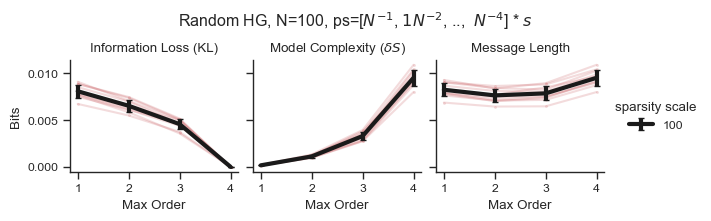

In [234]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2.1), constrained_layout=True, sharey=True)

n_s = len(info_losses)
alpha = 0.2

params = {"mfc": "white", "ms": 1, "lw": 1.5, "ls": "-", "marker":"o", "alpha": alpha}
params_err = {"mfc": "white", "ms": 1, "lw": 3, "ls": "-", "marker":"o", "zorder": 2, "capsize": 2}

ss = 100

for i, s in enumerate(sparsity_scales):
    if s != ss:
        continue
    for j in range(n_rep):
        ax1.plot(orders_arr[s][j], info_losses[s][j], c=f"C{i}", **params)
    info_loss_avg = np.nanmean(pad_arr_list(info_losses[s]), axis=0)
    info_loss_std = np.nanstd(pad_arr_list(info_losses[s]), axis=0)
    orders_i = sorted(orders_arr[s], key=len)[-1] # need to get the longest one to cover all
    ax1.errorbar(orders_i, info_loss_avg, yerr=info_loss_std, label=labels[i], c=f"k", **params_err)

ax1.set_title("Information Loss (KL)")
ax1.set_xlabel("Max Order")
ax1.set_ylabel("Bits")

for i, s in enumerate(sparsity_scales):
    if s != ss:
        continue
    for j in range(n_rep):
        ax2.plot(orders_arr[s][j], complexities[s][j], c=f"C{i}", **params)         
    complexities_avg = np.nanmean(pad_arr_list(complexities[s]), axis=0)
    complexities_std = np.nanstd(pad_arr_list(complexities[s]), axis=0)
    orders_i = sorted(orders_arr[s], key=len)[-1] # need to get the longest one to cover all
    ax2.errorbar(orders_i, complexities_avg, yerr=complexities_std, label=labels[i], c=f"k", **params_err)

    
ax2.set_title("Model Complexity ($\delta S$)")
ax2.set_xlabel("Max Order")

for i, s in enumerate(sparsity_scales):
    if s != ss:
        continue
    for j in range(n_rep):
        #message_length = complexities[i] + info_losses[i]
        ax3.plot(orders_arr[s][j], message_lengths[s][j], c=f"C{i}", **params) 
    message_lengths_avg = np.nanmean(pad_arr_list(message_lengths[s]), axis=0)
    message_lengths_std = np.nanstd(pad_arr_list(message_lengths[s]), axis=0)
    orders_i = sorted(orders_arr[s], key=len)[-1] # need to get the longest one to cover all
    ax3.errorbar(orders_i, message_lengths_avg, yerr=message_lengths_std, label=labels[i], c=f"k", **params_err)


ax3.legend(title="sparsity scale", bbox_to_anchor=(1, 0.5), frameon=False, loc="center left")

ax3.set_title("Message Length")
ax3.set_xlabel("Max Order")

sb.despine()

fig.suptitle(rf"Random HG, N={N}, ps=[$N^{{-1}}$, $1 N^{{-2}}$, ..,  $N^{{-4}}$] * $s$")

fig_name = f"message_length_RHG_N{N}_pwiring_{ss}_nreps_{n_rep}"
#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

In [235]:
for i, s in enumerate(sparsity_scales):
    message_lengths[s] = pad_arr_list(message_lengths[s])

In [236]:
df = pd.DataFrame.from_dict(message_lengths, orient="index").stack().to_frame()
df

0
1   0  [0.013011517511260291, 0.012777528052777275, 0...
    1  [0.013442266293297818, 0.013928695008638158, 0...
    2  [0.012767066796628875, 0.012862418231170247, 0...
    3  [0.020610765495421984, 0.020911775003143965, 0...
    4  [0.02622747684631605, 0.028057503972570796, 0....
    5  [0.013010057037214862, 0.013444604058024442, 0...
    6  [0.017084270952337697, 0.01751583731803837, 0....
    7  [0.022565553822142422, 0.02209530021037923, 0....
    8  [0.022073742548472816, 0.023145109082883197, 0...
    9  [0.024692723871862565, 0.024445337234496368, 0...
10  0  [0.01166920493741136, 0.011711369797931047, 0....
    1  [0.019793669398710217, 0.019432304851945754, 0...
    2  [0.009007424058641769, 0.00933292678355848, 0....
    3  [0.015058625632000187, 0.014414189614440378, 0...
    4  [0.019736010814377255, 0.018850143495907218, 0...
    5  [0.010835062623468509, 0.01044328112192187, 0....
    6  [0.017242151251445417, 0.017354124134482563, 0...
    7  [0.01640917105625393, 0.016674644475129202, 0....
    8  [0.022716964887011182, 0.023164536827049734, 0...
    9  [0.012217832843490612, 0.01220677617783452, 0....
50  0  [0.010995799201137513, 0.010790267249334563, 0...
    1  [0.01169724541476954, 0.011120929064497236, 0....
    2  [0.011142502297345397, 0.010523056337689615, 0...
    3  [0.012477974486359407, 0.012406270760131358, 0...
    4  [0.01062285679163611, 0.010370434902363466, 0....
    5  [0.010400801588537352, 0.009797744594824367, 0...
    6  [0.008184221419490843, 0.008166662374771715, 0...
    7  [0.011927364805090795, 0.011326011157300753, 0...
    8  [0.012463710327673627, 0.011453293921203693, 0...
    9  [0.011528981046796463, 0.011871297009023056, 0...
100 0  [0.007807756785558985, 0.007004080430386146, 0...
    1  [0.007889697722841572, 0.00738787283033613, 0....
    2  [0.008658299091084502, 0.008098714375616337, 0...
    3  [0.007890101634230533, 0.007138998221199032, 0...
    4  [0.009272388377529445, 0.008362324850034332, 0...
    5  [0.00901519936506466, 0.008407034147344575, 0....
    6  [0.00901656299878055, 0.008626683344313532, 0....
    7  [0.006854763599265359, 0.006430768724600744, 0...
    8  [0.008217126867494387, 0.007703158656236546, 0...
    9  [0.007623011258550999, 0.007063916736382826, 0...

In [237]:
for i, d in enumerate(orders_i):
    df[d] = df[0].apply(lambda x: x[i])
    
df = df[orders_i]
df

1         2         3         4
1   0  0.013012  0.012778  0.012431       NaN
    1  0.013442  0.013929  0.013969       NaN
    2  0.012767  0.012862  0.013445  0.012619
    3  0.020611  0.020912  0.021132       NaN
    4  0.026227  0.028058  0.028251  0.026216
    5  0.013010  0.013445  0.013049  0.012670
    6  0.017084  0.017516  0.018141  0.016085
    7  0.022566  0.022095  0.021967       NaN
    8  0.022074  0.023145  0.022441       NaN
    9  0.024693  0.024445  0.025970  0.025755
10  0  0.011669  0.011711  0.012860  0.011651
    1  0.019794  0.019432  0.018611  0.020597
    2  0.009007  0.009333  0.008988  0.009094
    3  0.015059  0.014414  0.015720  0.015603
    4  0.019736  0.018850  0.018807  0.020169
    5  0.010835  0.010443  0.010596  0.010479
    6  0.017242  0.017354  0.016963  0.017451
    7  0.016409  0.016675  0.015700  0.017020
    8  0.022717  0.023165  0.022811  0.022999
    9  0.012218  0.012207  0.011318  0.012791
50  0  0.010996  0.010790  0.011409  0.012048
    1  0.011697  0.011121  0.011486  0.012628
    2  0.011143  0.010523  0.010474  0.011936
    3  0.012478  0.012406  0.012683  0.013406
    4  0.010623  0.010370  0.010070  0.011473
    5  0.010401  0.009798  0.010102  0.011572
    6  0.008184  0.008167  0.008562  0.009256
    7  0.011927  0.011326  0.011320  0.012794
    8  0.012464  0.011453  0.011657  0.013172
    9  0.011529  0.011871  0.011344  0.012533
100 0  0.007808  0.007004  0.007359  0.009226
    1  0.007890  0.007388  0.007557  0.009045
    2  0.008658  0.008099  0.008011  0.009872
    3  0.007890  0.007139  0.007447  0.009012
    4  0.009272  0.008362  0.008927  0.010887
    5  0.009015  0.008407  0.008240  0.010254
    6  0.009017  0.008627  0.008789  0.010393
    7  0.006855  0.006431  0.006457  0.007980
    8  0.008217  0.007703  0.008481  0.009642
    9  0.007623  0.007064  0.007143  0.008723

In [238]:
dff = df.reset_index(names=["sparsity", "rep"]).melt(
    id_vars=["sparsity", "rep"],
    value_vars=orders_i,
    var_name="order",
    value_name="message_length",
)

/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  vals = y if x is None else x


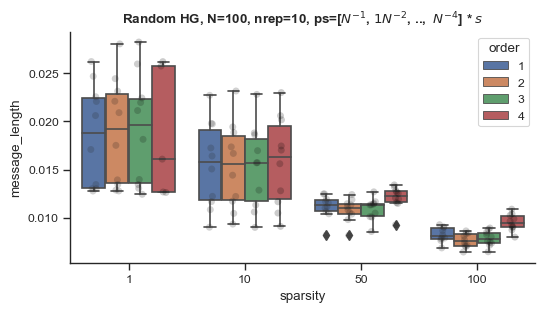

In [255]:
from statannotations.Annotator import Annotator

fix, ax = plt.subplots(figsize=(6, 3))

#palette = sb.color_palette("Set1", n_colors=4)

#box_params = {
#    'boxprops':{'facecolor':'none'},
#    'medianprops':{'color':'silver'},
    #'whiskerprops':{'color':'blue'},
    #'capprops':{'color':'yellow'}
#}

sb.boxplot(data=dff, hue="order", y="message_length", x="sparsity", ax=ax)#, **box_params)

sb.stripplot(data=dff, hue="order", y="message_length", x="sparsity", ax=ax, color="black", dodge=True, alpha=0.2, legend=False)

sb.despine()
ax.set_title(rf"Random HG, N={N}, nrep={n_rep}, ps=[$N^{{-1}}$, $1 N^{{-2}}$, ..,  $N^{{-4}}$] * $s$", weight="bold")


pairs = []
for s in sparsity_scales:
    pairs.append( [(s, 3), (s, 4) ] )
    pairs.append( [(s, 1), (s, 2) ] )
    pairs.append( [(s, 1), (s, 3) ] )
    pairs.append( [(s, 1), (s, 4) ] )
    pairs.append( [(s, 2), (s, 3) ] )
    pairs.append( [(s, 2), (s, 4) ] )

#annotator = Annotator(ax, pairs, data=dff, x="sparsity", y="message_length", hue="order")
#annotator.configure(test='t-test_welch', text_format='star', loc='inside')
#annotator.apply_and_annotate()

fig_name = f"message_length_RHG_N{N}_pwiring_{sparsity_scales}_nreps_{n_rep}_boxplot"
#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")


In [61]:
# Find the shape of the longest array
max_shape = max([a.shape[0] for a in info_losses[s]])
print(max_shape)

# Pad the shorter arrays with zeros
padded_arr_list = [np.pad(a, (0, max_shape-a.shape[0]), mode='constant', constant_values=None) for a in info_losses[s]]
padded_arr_list

4


[array([0.01845941, 0.01536632, 0.        ,        nan]),
 array([0.01053688, 0.01036466, 0.00762809, 0.        ]),
 array([0.01731618, 0.01680101, 0.0097414 , 0.        ]),
 array([0.0120621 , 0.00945102, 0.        ,        nan]),
 array([0.01041306, 0.00980892, 0.0069563 , 0.        ])]

In [57]:
Tinfo_losses[s]

/var/folders/wm/5gv37br900l73y63tjf8sr1r0000gn/T/ipykernel_14986/1676705717.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(info_losses[s])


array([array([0.01845941, 0.01536632, 0.        ]),
       array([0.01053688, 0.01036466, 0.00762809, 0.        ]),
       array([0.01731618, 0.01680101, 0.0097414 , 0.        ]),
       array([0.0120621 , 0.00945102, 0.        ]),
       array([0.01041306, 0.00980892, 0.0069563 , 0.        ])],
      dtype=object)

In [65]:
np.nanmean(padded_arr_list, axis=0)

array([0.01375753, 0.01235839, 0.00486516, 0.        ])

In [29]:
label=labels[i]

IndexError: list index out of range

In [28]:
info_losses[i][j]

array([0.02205507, 0.02138309, 0.01857405, 0.        ])

In [20]:
orders

array([1, 2, 3, 4])

### single tau

In [65]:
info_losses = []
complexities = []
orders_arr = []
message_lengths = []

for H0 in Hs:
    
    orders = np.array(xgi.unique_edge_sizes(Hs[0])) - 1
    tau_c = np.mean([find_charact_tau(H0, orders, weights, rescale_per_node=False) for H0 in Hs])
    print(tau_c)
    Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)
    
    info_losses.append(Ds_H)
    complexities.append(lZs_H)
    orders_arr.append(orders)
    message_lengths.append(Ds_H + lZs_H)

labels = [f"{i}" for i in sparsity_scales]

0.03838153966902697
0.03838153966902697
0.03838153966902697
0.03838153966902697


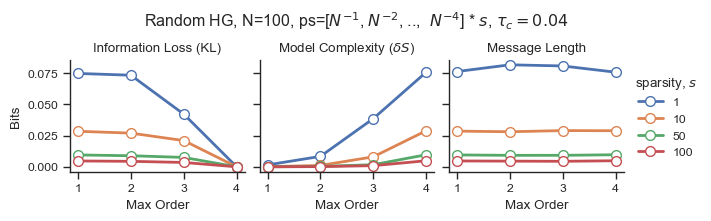

In [69]:
fig, axs = plot_3panels(info_losses, complexities, orders_arr, labels, legend_title="sparsity, $s$")

fig.suptitle(rf"Random HG, N={N}, ps=[$N^{{-1}}$, $N^{{-2}}$, ..,  $N^{{-4}}$] * $s$, $\tau_c = {tau_c:.2f}$")

fig_name = f"message_length_RHG_N{N}_pwiring_{sparsity_scales}_single_tau"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

## Generate random structure

In [68]:
N = 50
ps = 3 * np.array([1/N, 1/N**2, 1/N**3, 1/N**4])

#H0 = xgi.random_simplicial_complex(N, ps, seed=42)

p = 0.1
H0 = xgi.random_flag_complex(N, p)

print(H0)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

Unnamed SimplicialComplex with 50 nodes and 149 simplices


In [69]:
orders

array([1, 2])

<Axes: >

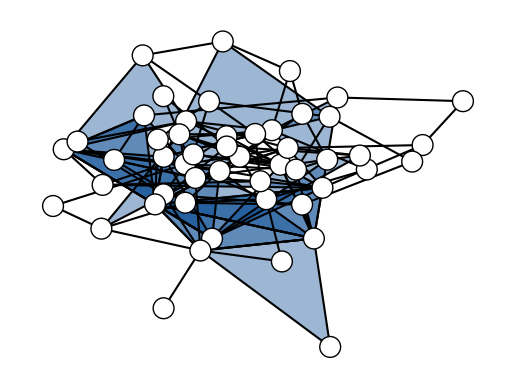

In [70]:
xgi.draw(H0)

## Compute Laplacian and tau_c

In [71]:
L_multi = xgi.multiorder_laplacian(
    H0, orders, weights, rescale_per_node=False, sparse=False
)

In [72]:
L_multi.shape

(50, 50)

In [73]:
tau_c = find_charact_tau(H0, orders, weights, sparse=False)

In [74]:
tau_c

0.04828377751092019

In [75]:
Ds_H, lZs_H, orders = compute_information(H0, tau_c, sparse=False)

In [76]:
Ds_H, lZs_H

(array([0.01080481, 0.        ]), array([0.00047041, 0.01403743]))

## Shuffle single order

In [77]:
#np.savez(f"{out_dir}{fig_name}.npz", Q=Q, Ds_H=Ds_H, lZs_H=lZs_H, orders=orders)

In [78]:
d_shuffles = range(1, xgi.max_edge_order(H0) + 1) #[1, 2, 3, 4] # orders to shuffle
p_shuffle = 1 # probability of shuffling

Hs = []

# create copies of the hypergraph with edges shuffled
for d_shuffle in d_shuffles:
    if d_shuffle <= xgi.max_edge_order(H0):
        print(d_shuffle)
        Hs.append(shuffle_hyperedges(S=H0, order=d_shuffle, p=p_shuffle))

1
2


In [79]:
# compute message length
Ds_H = []
lZs_H = []
Qs_H = []

for H in tqdm([H0] + Hs):
    
    Ds_H_i, lZs_H_i, orders = compute_information(H, tau_c, rescale_per_node=False)
    Q_i = Ds_H_i + lZs_H_i
    
    Ds_H.append(Ds_H_i)
    lZs_H.append(lZs_H_i)
    Qs_H.append(Q_i)

100%|█████████████████████████████████████████████| 3/3 [00:00<00:00, 33.77it/s]


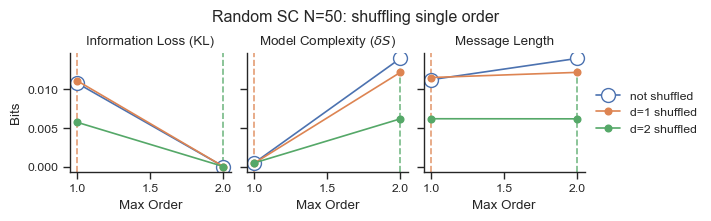

In [80]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2.1), constrained_layout=True, sharey=True)


#ax1.plot(orders, Ds_H, "o-", ms=7, mfc="w", lw=2)

ax1.plot(orders, Ds_H[0], "o-", label=f"not shuffled", ms=10, mfc="white")    
#ax1.axvline(d_shuffles[0], ls="--", c=f"C0", zorder=-2, alpha=0.8)
for j, H in enumerate(Hs):
    ax1.plot(orders, Ds_H[j+1], "o-", label=f"d={d_shuffles[j]} shuffled")
    ax1.axvline(d_shuffles[j], ls="--", c=f"C{j+1}", zorder=-2, alpha=0.8)

ax1.set_title("Information Loss (KL)")
ax1.set_xlabel("Max Order")
ax1.set_ylabel("Bits")

#ax2.plot(orders, lZs_H, "o-", ms=7, mfc="w", lw=2)

ax2.plot(orders, lZs_H[0], "o-", label=f"not shuffled", ms=10, mfc="white")    
#ax1.axvline(d_shuffles[0], ls="--", c=f"C0", zorder=-2, alpha=0.8)
for j, H in enumerate(Hs):
    ax2.plot(orders, lZs_H[j+1], "o-", label=f"d={d_shuffles[j]} shuffled")
    ax2.axvline(d_shuffles[j], ls="--", c=f"C{j+1}", zorder=-2, alpha=0.8)

ax2.set_title("Model Complexity ($\delta S$)")
ax2.set_xlabel("Max Order")

#ax3.plot(orders, Q, "o-", ms=7, mfc="w", lw=2)
ax3.plot(orders, Qs_H[0], "o-", label=f"not shuffled", ms=10, mfc="white")    
#ax1.axvline(d_shuffles[0], ls="--", c=f"C0", zorder=-2, alpha=0.8)
for j, H in enumerate(Hs):
    ax3.plot(orders, Qs_H[j+1], "o-", label=f"d={d_shuffles[j]} shuffled")
    ax3.axvline(d_shuffles[j], ls="--", c=f"C{j+1}", zorder=-2, alpha=0.8)

#y = np.where(Q == min(Q)) * np.ones(len(Q)) + 1
#x = np.linspace(np.min(Q), np.max(Q), len(Q))
#ax3.plot(y[0], x, c="r", lw=4, alpha=0.7, ls="--", zorder=-2)

ax3.legend(bbox_to_anchor=(1, 0.5), frameon=False, loc="center left")

ax3.set_title("Message Length")
ax3.set_xlabel("Max Order")

sb.despine()

fig.suptitle(f"Random SC N={N}: shuffling single order")

fig_name = f"message_length_RSC_N{N}_shuffling_single_order" #lambda2_HG_SC_N_{N}_ps_{ps}_nrep_{n_repetitions}"

#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

## Shuffle more orders

In [58]:
d_shuffles = range(1, xgi.max_edge_order(H0) + 1) #[1, 2, 3, 4] # orders to shuffle
p_shuffle = 1 # probability of shuffling

Hs = []

# create copies of the hypergraph with edges shuffled
for i, d_shuffle in enumerate(d_shuffles):
    if d_shuffle <= xgi.max_edge_order(H0):
        print(d_shuffle)
        if i==0:
            H_base = H0
        else:
            H_base = Hs[-1]
        Hs.append(shuffle_hyperedges(S=H_base, order=d_shuffle, p=p_shuffle))

1
2
3
4


In [59]:
# compute message length
Ds_H = []
lZs_H = []
Qs_H = []

for H in tqdm([H0] + Hs):
    
    Ds_H_i, lZs_H_i, orders = compute_information(H, tau_c, rescale_per_node=False)
    Q_i = Ds_H_i + lZs_H_i
    
    Ds_H.append(Ds_H_i)
    lZs_H.append(lZs_H_i)
    Qs_H.append(Q_i)

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 16.77it/s]


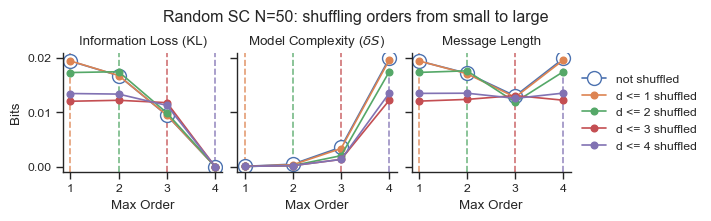

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2.1), constrained_layout=True, sharey=True)


#ax1.plot(orders, Ds_H, "o-", ms=7, mfc="w", lw=2)

ax1.plot(orders, Ds_H[0], "o-", label=f"not shuffled", ms=10, mfc="white")    
#ax1.axvline(d_shuffles[0], ls="--", c=f"C0", zorder=-2, alpha=0.8)
for j, H in enumerate(Hs):
    ax1.plot(orders, Ds_H[j+1], "o-", label=f"d={d_shuffles[j]} shuffled")
    ax1.axvline(d_shuffles[j], ls="--", c=f"C{j+1}", zorder=-2, alpha=0.8)

ax1.set_title("Information Loss (KL)")
ax1.set_xlabel("Max Order")
ax1.set_ylabel("Bits")

#ax2.plot(orders, lZs_H, "o-", ms=7, mfc="w", lw=2)

ax2.plot(orders, lZs_H[0], "o-", label=f"not shuffled", ms=10, mfc="white")    
#ax1.axvline(d_shuffles[0], ls="--", c=f"C0", zorder=-2, alpha=0.8)
for j, H in enumerate(Hs):
    ax2.plot(orders, lZs_H[j+1], "o-", label=f"d={d_shuffles[j]} shuffled")
    ax2.axvline(d_shuffles[j], ls="--", c=f"C{j+1}", zorder=-2, alpha=0.8)

ax2.set_title("Model Complexity ($\delta S$)")
ax2.set_xlabel("Max Order")

#ax3.plot(orders, Q, "o-", ms=7, mfc="w", lw=2)
ax3.plot(orders, Qs_H[0], "o-", label=f"not shuffled", ms=10, mfc="white")    
#ax1.axvline(d_shuffles[0], ls="--", c=f"C0", zorder=-2, alpha=0.8)
for j, H in enumerate(Hs):
    ax3.plot(orders, Qs_H[j+1], "o-", label=f"d <= {d_shuffles[j]} shuffled")
    ax3.axvline(d_shuffles[j], ls="--", c=f"C{j+1}", zorder=-2, alpha=0.8)

#y = np.where(Q == min(Q)) * np.ones(len(Q)) + 1
#x = np.linspace(np.min(Q), np.max(Q), len(Q))
#ax3.plot(y[0], x, c="r", lw=4, alpha=0.7, ls="--", zorder=-2)

ax3.legend(bbox_to_anchor=(1, 0.5), frameon=False, loc="center left")

ax3.set_title("Message Length")
ax3.set_xlabel("Max Order")

sb.despine()

fig.suptitle(f"Random SC N={N}: shuffling orders from small to large")

fig_name = f"message_length_RSC_N{N}_shuffling_ascending_orders" #lambda2_HG_SC_N_{N}_ps_{ps}_nrep_{n_repetitions}"

plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

<Axes: >

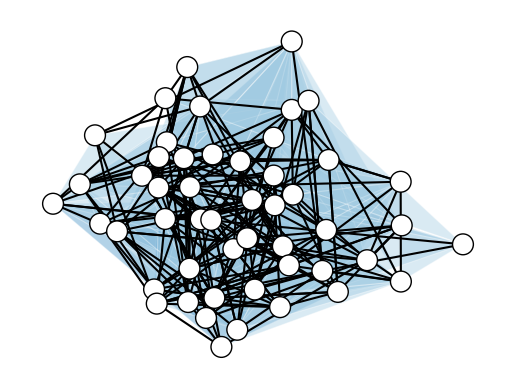

In [61]:
xgi.draw(Hs[-1])

In [ ]:
ax.plot(orders, Qs_H[0], "o-", label=f"not shuffled", ms=10, mfc="white")    
ax.axvline(d_shuffles[0], ls="--", c=f"C0", zorder=-2, alpha=0.8)

for j, H in enumerate(Hs):
    ax.plot(orders, Qs_H[j+1], "o-", label=f"d={d_shuffles[j]} shuffled")

    ax.axvline(d_shuffles[j], ls="--", c=f"C{j+1}", zorder=-2, alpha=0.8)

### Multiple taus

In [4]:
taus = [0.01, 0.1, 1]

Ds_H0, lZs_H0, orders = compute_information(H0, taus)

Ds_H = []
lZs_H = []

for i, H in enumerate(Hs):
    Ds_Hi, lZs_Hi, _ = compute_information(H, taus)
    Ds_H.append(Ds_Hi)
    lZs_H.append(lZs_Hi)

  0%|                                                           | 0/3 [00:00<?, ?it/s]

logm result may be inaccurate, approximate err = 8.016742853678119e-13
logm result may be inaccurate, approximate err = 8.016742853678119e-13
logm result may be inaccurate, approximate err = 4.350871144409221e-13
logm result may be inaccurate, approximate err = 8.016742853678119e-13
logm result may be inaccurate, approximate err = 5.737900525699966e-13
logm result may be inaccurate, approximate err = 8.016742853678119e-13
logm result may be inaccurate, approximate err = 6.203558125681481e-13
logm result may be inaccurate, approximate err = 8.016742853678119e-13
logm result may be inaccurate, approximate err = 6.773212233745527e-13
logm result may be inaccurate, approximate err = 8.016742853678119e-13
logm result may be inaccurate, approximate err = 6.777192526438904e-13
logm result may be inaccurate, approximate err = 8.016742853678119e-13
logm result may be inaccurate, approximate err = 6.646021326160591e-13
logm result may be inaccurate, approximate err = 8.016742853678119e-13
logm r

 33%|█████████████████                                  | 1/3 [00:32<01:04, 32.14s/it]

logm result may be inaccurate, approximate err = 8.016742853678119e-13
logm result may be inaccurate, approximate err = 5.545146344167048e-13
logm result may be inaccurate, approximate err = 5.545146344167048e-13
logm result may be inaccurate, approximate err = 3.3062057911895115e-13
logm result may be inaccurate, approximate err = 5.545146344167048e-13
logm result may be inaccurate, approximate err = 4.1746236265241017e-13
logm result may be inaccurate, approximate err = 5.545146344167048e-13
logm result may be inaccurate, approximate err = 4.810776025461899e-13
logm result may be inaccurate, approximate err = 5.545146344167048e-13
logm result may be inaccurate, approximate err = 4.616164791306845e-13
logm result may be inaccurate, approximate err = 5.545146344167048e-13
logm result may be inaccurate, approximate err = 5.193045376130101e-13
logm result may be inaccurate, approximate err = 5.545146344167048e-13
logm result may be inaccurate, approximate err = 5.485694258565133e-13
logm

 67%|██████████████████████████████████                 | 2/3 [01:13<00:37, 37.57s/it]

logm result may be inaccurate, approximate err = 5.545146344167048e-13


  0%|                                                           | 0/3 [00:00<?, ?it/s]

logm result may be inaccurate, approximate err = 6.755343319530016e-13
logm result may be inaccurate, approximate err = 6.755343319530016e-13
logm result may be inaccurate, approximate err = 4.350871144409221e-13
logm result may be inaccurate, approximate err = 6.755343319530016e-13
logm result may be inaccurate, approximate err = 5.564852645269207e-13
logm result may be inaccurate, approximate err = 6.755343319530016e-13
logm result may be inaccurate, approximate err = 6.081482829268497e-13
logm result may be inaccurate, approximate err = 6.755343319530016e-13
logm result may be inaccurate, approximate err = 7.494668897480793e-13
logm result may be inaccurate, approximate err = 6.755343319530016e-13
logm result may be inaccurate, approximate err = 6.80331195162655e-13
logm result may be inaccurate, approximate err = 6.755343319530016e-13
logm result may be inaccurate, approximate err = 6.12934194294414e-13
logm result may be inaccurate, approximate err = 6.733813046114849e-13
logm res

 33%|█████████████████                                  | 1/3 [00:32<01:04, 32.02s/it]

logm result may be inaccurate, approximate err = 6.755343319530016e-13
logm result may be inaccurate, approximate err = 5.2440390326132e-13
logm result may be inaccurate, approximate err = 5.2440390326132e-13
logm result may be inaccurate, approximate err = 3.3062057911895115e-13
logm result may be inaccurate, approximate err = 5.2440390326132e-13
logm result may be inaccurate, approximate err = 4.39765895469052e-13
logm result may be inaccurate, approximate err = 5.2440390326132e-13
logm result may be inaccurate, approximate err = 5.498993759400098e-13
logm result may be inaccurate, approximate err = 5.2440390326132e-13
logm result may be inaccurate, approximate err = 5.173522064043902e-13
logm result may be inaccurate, approximate err = 5.2440390326132e-13
logm result may be inaccurate, approximate err = 5.139959220314275e-13
logm result may be inaccurate, approximate err = 5.2440390326132e-13
logm result may be inaccurate, approximate err = 5.056209685820947e-13
logm result may be i

 67%|██████████████████████████████████                 | 2/3 [01:12<00:37, 37.17s/it]

logm result may be inaccurate, approximate err = 5.2440390326132e-13


  0%|                                                           | 0/3 [00:00<?, ?it/s]

logm result may be inaccurate, approximate err = 5.959372360557085e-13
logm result may be inaccurate, approximate err = 5.959372360557085e-13
logm result may be inaccurate, approximate err = 4.350871144409221e-13
logm result may be inaccurate, approximate err = 5.959372360557085e-13
logm result may be inaccurate, approximate err = 5.737900525699966e-13
logm result may be inaccurate, approximate err = 5.959372360557085e-13
logm result may be inaccurate, approximate err = 6.203558125681481e-13
logm result may be inaccurate, approximate err = 6.06707253999062e-13
logm result may be inaccurate, approximate err = 7.285039839544788e-13
logm result may be inaccurate, approximate err = 6.06707253999062e-13
logm result may be inaccurate, approximate err = 6.654771462082654e-13
logm result may be inaccurate, approximate err = 5.959372360557085e-13
logm result may be inaccurate, approximate err = 5.93464251332303e-13
logm result may be inaccurate, approximate err = 5.959372360557085e-13
logm resu

 33%|█████████████████                                  | 1/3 [00:31<01:03, 31.80s/it]

logm result may be inaccurate, approximate err = 5.959372360557085e-13
logm result may be inaccurate, approximate err = 4.526050651602394e-13
logm result may be inaccurate, approximate err = 4.523732150897055e-13
logm result may be inaccurate, approximate err = 3.3062057911895115e-13
logm result may be inaccurate, approximate err = 4.523732150897055e-13
logm result may be inaccurate, approximate err = 4.1746236265241017e-13
logm result may be inaccurate, approximate err = 4.523732150897055e-13
logm result may be inaccurate, approximate err = 4.810776025461899e-13
logm result may be inaccurate, approximate err = 4.523732150897055e-13
logm result may be inaccurate, approximate err = 5.598011680242306e-13
logm result may be inaccurate, approximate err = 4.523732150897055e-13
logm result may be inaccurate, approximate err = 5.290408948119364e-13
logm result may be inaccurate, approximate err = 4.523732150897055e-13
logm result may be inaccurate, approximate err = 5.467058460914497e-13
logm

 67%|██████████████████████████████████                 | 2/3 [01:12<00:36, 36.97s/it]

logm result may be inaccurate, approximate err = 4.523732150897055e-13


  0%|                                                           | 0/3 [00:00<?, ?it/s]

logm result may be inaccurate, approximate err = 8.111860267793886e-13
logm result may be inaccurate, approximate err = 8.111860267793886e-13
logm result may be inaccurate, approximate err = 4.350871144409221e-13
logm result may be inaccurate, approximate err = 8.111860267793886e-13
logm result may be inaccurate, approximate err = 5.737900525699966e-13
logm result may be inaccurate, approximate err = 8.111860267793886e-13
logm result may be inaccurate, approximate err = 6.203558125681481e-13
logm result may be inaccurate, approximate err = 8.111860267793886e-13
logm result may be inaccurate, approximate err = 6.773212233745527e-13
logm result may be inaccurate, approximate err = 8.111860267793886e-13
logm result may be inaccurate, approximate err = 6.777192526438904e-13
logm result may be inaccurate, approximate err = 8.111860267793886e-13
logm result may be inaccurate, approximate err = 6.465965546932534e-13
logm result may be inaccurate, approximate err = 8.111860267793886e-13
logm r

 33%|█████████████████                                  | 1/3 [00:34<01:09, 34.55s/it]

logm result may be inaccurate, approximate err = 8.072132206851038e-13
logm result may be inaccurate, approximate err = 6.497154082081749e-13
logm result may be inaccurate, approximate err = 6.497154082081749e-13
logm result may be inaccurate, approximate err = 3.3062057911895115e-13
logm result may be inaccurate, approximate err = 6.497154082081749e-13
logm result may be inaccurate, approximate err = 4.1746236265241017e-13
logm result may be inaccurate, approximate err = 6.497154082081749e-13
logm result may be inaccurate, approximate err = 4.810776025461899e-13
logm result may be inaccurate, approximate err = 6.497154082081749e-13
logm result may be inaccurate, approximate err = 4.951315226212706e-13
logm result may be inaccurate, approximate err = 6.497154082081749e-13
logm result may be inaccurate, approximate err = 5.193045376130101e-13
logm result may be inaccurate, approximate err = 6.497154082081749e-13
logm result may be inaccurate, approximate err = 4.818043931424125e-13
logm

 67%|██████████████████████████████████                 | 2/3 [01:15<00:38, 38.46s/it]

logm result may be inaccurate, approximate err = 6.497154082081749e-13


100%|███████████████████████████████████████████████████| 3/3 [01:58<00:00, 39.58s/it]


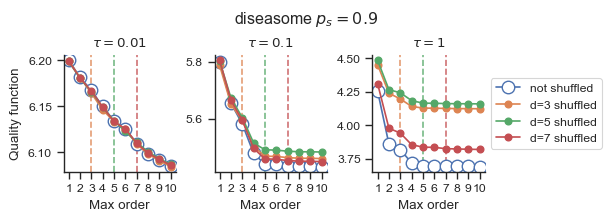

In [5]:
fig, axs = plt.subplots(
    1, len(taus), figsize=(2 * len(taus), 2.1), constrained_layout=True
)

for i, tau in enumerate(taus):

    axs[i].plot(orders, lZs_H0[i] - Ds_H0[i], "o-", label="not shuffled", ms=9, mfc="w")
    
    for j, H in enumerate(Hs):
        axs[i].plot(orders, lZs_H[j][i] - Ds_H[j][i], "o-", label=f"d={d_shuffles[j]} shuffled")
    
        axs[i].axvline(d_shuffles[j], ls="--", c=f"C{j+1}", zorder=-2, alpha=0.8)

    axs[i].set_title(rf"$\tau = {tau}$", weight="bold")
    axs[i].set_xlabel("Max order")
    axs[i].set_xticks(orders)

axs[0].set_ylabel("Quality function")
axs[-1].legend(loc="center left", bbox_to_anchor=(1, 0.5))

sb.despine()

fig.suptitle(f"{name} $p_s={p_shuffle}$")

fig_name = f"info_{name}_p_s_{p_shuffle}" #lambda2_HG_SC_N_{N}_ps_{ps}_nrep_{n_repetitions}"

#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

In [6]:
H = xgi.Hypergraph([[1,2], [1,2,3,4]])

xgi.multiorder_laplacian(H, orders=[1,2,3], weights=[1,1,1])

/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/matrix.py:310: UserWarning: No edges of order 2. Contribution of that order is zero. Its weight is effectively zero.
  warn(


array([[ 5., -3., -1., -1.],
       [-3.,  5., -1., -1.],
       [-1., -1.,  3., -1.],
       [-1., -1., -1.,  3.]])

In [7]:
xgi.multiorder_laplacian(H, orders=[1,3], weights=[1,1])

array([[ 5., -3., -1., -1.],
       [-3.,  5., -1., -1.],
       [-1., -1.,  3., -1.],
       [-1., -1., -1.,  3.]])

### Compute entropy

In [8]:
ents = {}

for i, tau in enumerate(taus):
    
    ents[tau] = {}
    
    for j, HG in enumerate([H0] + Hs):        
        d_max = xgi.max_edge_order(HG)
        L_multi = np.zeros((HG.num_nodes, HG.num_nodes))
        for d in range(1, d_max+1):
            #K, Adj, L = su.compute_laplacians(G, d+1)
            L = xgi.laplacian(HG, d, rescale_per_node=False)
            L_multi += L
        
        ent = entropy(L_multi, tau)
        
        dd = 0 if j==0 else d_shuffles[j-1]
        ents[tau][dd] = ent
        
ents_df = pd.DataFrame.from_dict(ents)
        
ents_df_long = ents_df.stack().rename('entropy').to_frame().reset_index(names=["shuffle", "tau"])
ents_df

,0.01,0.10,1.00
0,6.244639+0.000000j,6.175864+0.000000j,5.349064+0.000000j
3,6.244702+0.000000j,6.170229+0.000000j,5.332210+0.000000j
5,6.244534+0.000000j,6.167961+0.000000j,5.365889+0.000000j
7,6.244618+0.000000j,6.172695+0.000000j,5.355570+0.000000j


/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


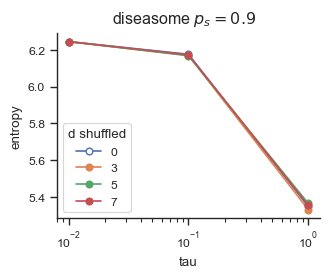

In [9]:
fig, ax  = plt.subplots(figsize=(3.4, 2.4))

for i, series in enumerate(ents_df.values):
    mfc = "w" if i==0 else None 
    ax.plot(ents_df.columns, series, "o-", label=ents_df.index[i], mfc=mfc)
    
ax.set_ylabel("entropy")
ax.set_xlabel("tau")
ax.legend(title="d shuffled")
ax.set_xscale("log", base=10)

sb.despine()

fig.suptitle(f"{name} $p_s={p_shuffle}$")

fig_name = f"info_{name}_p_s_{p_shuffle}_entropy" #lambda2_HG_SC_N_{N}_ps_{ps}_nrep_{n_repetitions}"
#plt.savefig(f"{fig_name}.png", dpi=250, bbox_inches="tight")